<a href="https://colab.research.google.com/github/Clinda02/text_data_analysis/blob/main/study/neural_network_basic_concrete_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망 학습

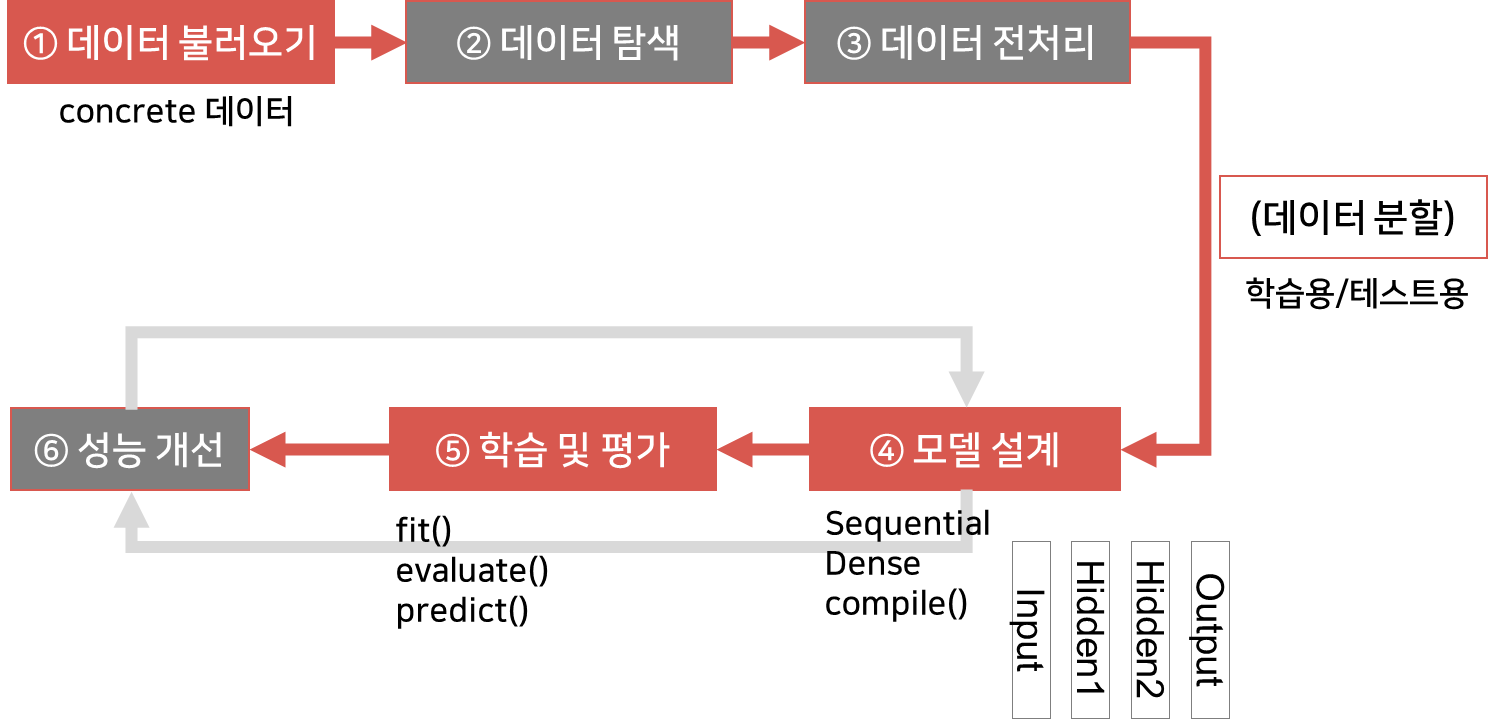

## 데이터 불러오기

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/zzhining/python_ml_dl/main/dataset/concrete.csv')
df.shape

(1030, 9)

In [12]:
df.columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   BlastFurnaceSlag     1030 non-null   float64
 2   FlyAsh               1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   CoarseAggregate      1030 non-null   float64
 6   FineAggregate        1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CompressiveStrength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## 데이터 분할

In [14]:
from sklearn.model_selection import train_test_split

# 데이터분할
y = df['CompressiveStrength']
X = df.drop(['CompressiveStrength'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
X_train.shape, X_test.shape

((772, 8), (258, 8))

## 모델 설계 및 학습

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(2)

# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim= X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))

# 모델 컴파일
model.compile(loss='mse',
            optimizer='adam',
            metrics=['mse'])

# 모델 실행
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50, batch_size=64)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 15877.9863 - mse: 15877.9863 - val_loss: 6336.8691 - val_mse: 6336.8691
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4138.8877 - mse: 4138.8877 - val_loss: 921.8453 - val_mse: 921.8453
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 893.9193 - mse: 893.9193 - val_loss: 948.8934 - val_mse: 948.8934
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1050.1885 - mse: 1050.1885 - val_loss: 1010.4998 - val_mse: 1010.4998
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1062.3229 - mse: 1062.3229 - val_loss: 893.2033 - val_mse: 893.2033
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 916.8859 - mse: 916.8859 - val_loss: 749.5529 - val_mse: 749.5529
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 744.1208 - mse: 744.1208 - val_loss: 685.6878 - val_mse: 685.6878
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 648.6346 - mse: 648.6346 - val_loss: 631.7687 - val_mse: 631.7687
Epoc

<Axes: >

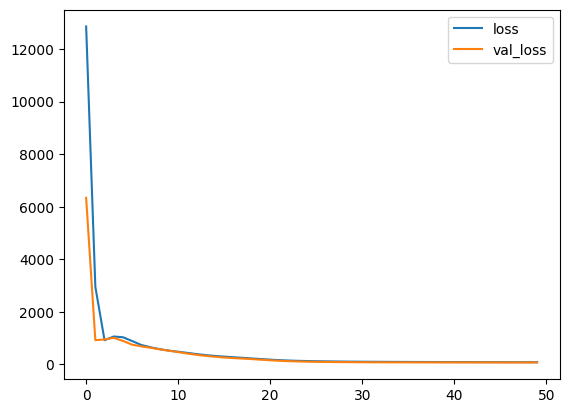

In [17]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()

## 모델 평가

In [18]:
# 모델 평가
model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 78.6315 - mse: 78.6315


[84.14698028564453, 84.14698028564453]

In [19]:
# 값 예측
model.predict(X_test)[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([65.90636], dtype=float32)

In [20]:
y_test.iloc[0]

52.91